## 3-3. 특성 공학과 규제
#### 학습 목표 
- 여러 특성을 사용한 다중 회귀에 대해 배우고 사이킷런의 여러 도구를 사용해 본다.
- 복자한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀를 배운다.

### 1. 다중 회귀 
- 앞에 3-2에서는 하나의 특성을 사용하여 선형 회귀 모델을 훈련시켰다. 여러 개의 특성을 사용한 선형 회귀 모델을 **다중 회귀(multiple regression)** 이라고 부른다. 
- 3-2에서처럼 1개의 특성을 사용했을 때, 선형 회귀 모델이 학습하는 것은 직선이다. 만약 2개의 특성을 사용하게 되면 선형 회귀는 평면을 학습한다. 

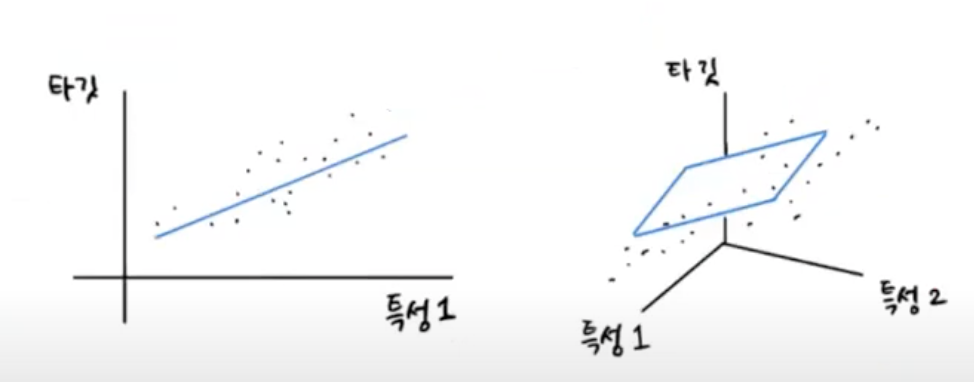

- 위의 오른쪽 그림처럼 특성이 2개면 타깃값과 함께 3차원 공간을 형성하고 선형 회귀 방정식 **'$타깃 = a \times 특성1 + b \times 특성2 + 절편$ '**은 평면이 된다. 그렇다면 특성이 3개일 경우는 어떻게 될까? 
- 아쉽게도 3차원 공간 이상을 그리거나 상상할 수 없다. 분명한 것은 선형 회귀를 단순한 직선이나 평면으로 생각하여 성능이 무조건 낮다고 오해하면 안된다. 특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현 할 수있다.
- 책의 에제에서 농어의 길이뿐만 아니라 농어의 높이와 두께도 함께 사용할 것이며, 또한 이전 내용에서처럼 3개의 특성을 각각 제곱하여 추가할 것이며, 추가로 각 특성을 서로 곱해서 또 다른 특성을 만들고자 한다. ('농어 길이 x 농어 높이'를 새로운 특성으로 만들기)
- 이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성 공학(feature engineering)**이라고 부른다.

### 2. 데이터 준비 - 판다스 데이터 프레임 
- 농어의 특성이 3개로 늘어났기 때문에 데이터를 다운로드 하고 싶지만 넘파이에는 이런 기능이 없다. 하지만 판다스 패키지를 사용하면 매우 편리해진다.
- **판다스(pandas)**는 유명한 데이터 분석 라이브러리 이며, 그중에서 **데이터프레임(dataframe)**은 판다스의 핵심 데이터 구조이다.
- 판다스를 사용해 농어 데이터를 인터넷에서 내려받아 데이터프레임에 저장하고 넘파이 배열로 변환하여 선형회귀 모델 훈련 하고자 한다. 참고로 데이터프레임을 만들기 위해 많이 사용하는 파일은 csv 파일이다. 
- 판다스의 read_csv() 함수에 주소를 넣어 데이터 프레임을 만든 다음, to_numpy() 매서드를 사용해 넘파이 배열로 바꾼다. (파일 웹사이트: https://bit.ly/perch_csv_data)

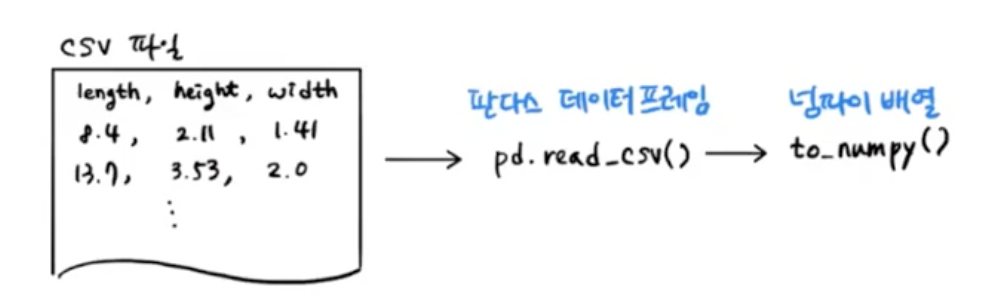

In [1]:
# 데이터 프레임 -> 넘파이 배열로 변경 

# 판다스 불러오기 
import pandas as pd

# 데이터 불러오기 (데이터 프레임)
df = pd.read_csv('https://bit.ly/perch_csv_data')

# 넘파이 배열로 변환 
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
# 타깃 데이터 준비 
import numpy as np
# 농어 무게 데이터 
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0,
    130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0,
    260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0]
)

In [4]:
# perch_full과 perch_weight 데이터를 훈련 세트와 테스트 세트로 나누기 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
     perch_full, perch_weight, random_state=42)

### 3. 사이킷런의 변환기
- 사이킷런은 특성을 만들거나 데이터 전처리를 위한 다양한 클래스를 제공한다, 이런 클래스를 **변환기(transformer)**라고 부른다. 
- 변환기 메서드는 **fit(), transorm()** 메서드를 제공한다.
- 이번에 사용할 변환기는 **PolynomiaFeatures** 클래스 

In [5]:
# 패키지 불러오기 - PolynomiaFeatures
from sklearn.preprocessing import PolynomialFeatures

- 2개의 특성 2와 3으로 이루어진 샘플 하나를 적용, 클래스의 객체를 만든 다음 fit(), transform() 메서드 차례대로 호출 

In [6]:
# 클래스 객체를 만든다음 각각 메서드 호출 

# 클래스 객체 만들기 
poly = PolynomialFeatures()

# 훈련 메서드 사용
poly.fit([[2, 3]])

# 변환기 메서드 호출 
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


- fit() 메서드는 새롭게 만들 특성 조합을 찾고 transform() 메서드는 실제로 데ㅇ터를 변환한다. 여기서 눈여겨 볼 점은 변환기로 변환하기 전 fit() 메서드를 사용하는데 타깃 데이터가 필요 하지 않다. (모델 클래스와 다르게 fit() 메서드에 입력 데이터만 전달함)
- 여기서에서는 2개의 특성 (원소)을 가진 샘플 [2, 3]이 6개의 특성을 가진 샘플 [1, 2, 3, 4, 6, 9]로 바뀜